# Lending Club Case Study
Problem Statement:
As a part of a Consumer Lending Finance Company, which specialises in lending various types of loans, we need to identify the patterns which indicates if a loan is likely to Default. When the company receives a loan application, it has to make a decision for loan approval based on applicant's profile. This decisioning is associated with 2 kinds of risks;

If the applicant is likely to pay the loan, not approving such loan will result in loss for the company;
If the applicant is likely to default the loan, approving such loan application will also result in loss.
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. We need to perform EDA to understand how consumer attributes and loan attributes infulence the decisioning. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

Import required libraries# 




#link to git hub

In [1]:
## Importing pandas and Numpy libraries
import pandas as pd
import numpy as np

## importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## importing datetime for extracting year and month from date
import datetime as dt

## importing warnings to ignore version related warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset and check the first five rows
loan_data = pd.read_csv(r"loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
## Checking the shape of dataframe to understand the rows and columns.
loan_data.shape

(39717, 111)

# Data Cleaning
Handling Null Values in Columns

In [4]:
## Check the number of null values in each of the columns
loan_data.isnull().sum().sort_values(ascending = False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [5]:
## Taking percentageage of null values in a columns

column_null_percent = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)

## Filtering only those columns which have more than 30% null values
column_null_percent[column_null_percent > 30.00]## Check the number of null values in each of the columns
loan_data.isnull().sum().sort_values(ascending = False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [6]:
## Checking column count where null value is more than 30%
column_null_percent[column_null_percent > 30.00].count()

58

In [7]:
## Length of 1st set of columns to be dropped
columns_to_beDropped1 = list(column_null_percent[column_null_percent > 30.00].index)
len(columns_to_beDropped1)

58

In [8]:
## Dropping identified columns and checking dataframe shape after that
loan_data = loan_data.drop(columns_to_beDropped1, axis=1)

loan_data.shape

(39717, 53)

In [77]:
## Check the remaining number of null values in the columns 

(loan_data.isnull().sum()/loan_data.shape[0])*100

id                      0.000000
loan_amnt               0.000000
term_in_months          0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length_in_years     0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util_percent      0.000000
pub_rec_bankruptcies    0.000000
issue_month             0.000000
issue_year              0.000000
loanToIncome            0.000000
annualIncomeCategory    0.036291
intRateCategory         0.000000
loanAmountCategory      0.000000
dtiCategory             0.461415
dtype: float64

In [10]:
## Here we are finding unique value counts in the remaining columns.

def unique_counts(df):
    for i in df.columns:
        print("Unique values count in {0}: {1}".format(i, len(df[i].unique())))


unique_counts(loan_data) 

Unique values count in id: 39717
Unique values count in member_id: 39717
Unique values count in loan_amnt: 885
Unique values count in funded_amnt: 1041
Unique values count in funded_amnt_inv: 8205
Unique values count in term: 2
Unique values count in int_rate: 371
Unique values count in installment: 15383
Unique values count in grade: 7
Unique values count in sub_grade: 35
Unique values count in emp_title: 28821
Unique values count in emp_length: 12
Unique values count in home_ownership: 5
Unique values count in annual_inc: 5318
Unique values count in verification_status: 3
Unique values count in issue_d: 55
Unique values count in loan_status: 3
Unique values count in pymnt_plan: 1
Unique values count in url: 39717
Unique values count in purpose: 14
Unique values count in title: 19616
Unique values count in zip_code: 823
Unique values count in addr_state: 50
Unique values count in dti: 2868
Unique values count in delinq_2yrs: 11
Unique values count in earliest_cr_line: 526
Unique value

From the above unique values, we can see that there are many columns which have only 2 unique values. These can be checked for Null as one of the values. If they contain null values, those columns can be dropped as only 1 uniques value does not influence the decision.## 

In [11]:
loan_data['tax_liens'].unique()

array([ 0., nan])

In [13]:
loan_data['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [14]:
loan_data['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [15]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

#We can see from above checks, that among the columns which has 2 unique values, the 'term' column has actually 2 unique values, other have only 1 actual unique value from 2 (the other value is null - which does not have any impact loan decision)
#The columns 'id' and 'member_id' have all unique values. One of the column can be dropped. This does not have any impact the decision process.# 

In [16]:
## funded_amnt - it is amount that has been approved from LC. Hence can be dropped.
## funded_amnt_inv - it is the amount funded by the investor. Hence can be dropped.
## collection_recovery_fee - it is fee collected after charge off. Hence can be dropped.
## delinq_2yrs - no. of 30+ days after loan funded for delinq. Hence can be dropped.
## earliest_cr_line - earliest month in which borrower reported credit line open. Hence can be removed.
## last_pymnt_amnt - last total amount paid. Hence can be dropped.
## last_pymnt_d - Last payment date. Hence can be dropped.
## out_prncp - remaining outstanding amount of principle funded. Hence can be dropped.
## out_prncp_inv - remaining outstanding amount of principle funded by investors. Hence can be dropped.
## recoveries - post chargeoff recoveries. Hence can be dropped.
## total_pymnt - Total payment received for amount funded. Hence can be dropped.
## total_pymnt_inv - Total payment received for amount funded by investor. Hence can be dropped.
## total_rec_int - Total interest received. Hence can be dropped.
## total_rec_late_fee - Total late fees received. Hence can be dropped.
## total_rec_prncp - Total principal received. Hence can be dropped.
#above columns can be removed as it does not have any impact on analysis

columnsToBeDropped2 = ['member_id','pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
                      'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']

loan_data = loan_data.drop(columnsToBeDropped2, axis = 1)

columnsToBeDropped3 = ['funded_amnt', 'funded_amnt_inv', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 
                        'last_pymnt_amnt','last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 
                        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']

loan_data = loan_data.drop(columnsToBeDropped3, axis=1)

loan_data.shape

(39717, 28)

In [17]:
loan_data['emp_title'].unique()
loan_data['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

# The column 'emp_title' has many unique value hence can be dropped. Also the columns url, title, zip_code, addr_state, inq_last_6mths, open_acc, total_acc, last_credit_pull_d can be dropped and it does not impact analysis


In [18]:
## dropping columns which are not required such as emp_title, 
## url, title, inq_last_6mths, open_acc, total_acc, last_credit_pull_d - based on the value it has

columns_to_be_dropped4 = ['emp_title', 'url', 'title', 'zip_code', 'addr_state', 'inq_last_6mths', 'open_acc', 'total_acc', 'last_credit_pull_d' , 'id']

loan_data = loan_data.drop(columns_to_be_dropped4, axis=1)

loan_data.shape

(39717, 19)

In [19]:
## Checking the null values
loan_data.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
pub_rec                    0
revol_bal                  0
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [20]:
## Checking all the values in column 'emp_length'
loan_data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:

loan_data.isnull().sum().sort_values(ascending = False)

emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
verification_status        0
revol_bal                  0
pub_rec                    0
dti                        0
purpose                    0
loan_status                0
issue_d                    0
id                         0
loan_amnt                  0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
annual_inc                 0
dtype: int64

# Assuming - < 1 year to be 0 years and 10+ years to be 10 years

In [22]:
## Imputing mode value for null values in 'emp_length' column
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0])

## Assuming - < 1 year to be 0 years and 10+ years to be 10 years for all practical purpose, 
## assigning these values in the data frame.
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x : 0 if x=='< 1 year' else int(x[0:2].strip()))

## renaming column to reflect year in column name.
loan_data.rename(columns= {'emp_length': 'emp_length_in_years'}, inplace = True)

loan_data['emp_length_in_years'].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length_in_years, dtype: int64

In [23]:
## Checking all the values in column 'revol_util'
loan_data['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [24]:
## Impute mode for null values in 'revol_util' column
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mode()[0])

## removing percent symbol
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x : float(x.rstrip('%')))

## rename the column name to reflect percent
loan_data.rename(columns= {'revol_util': 'revol_util_percent'}, inplace = True)

loan_data['revol_util_percent'].value_counts()

0.00     1027
0.20       63
63.00      62
40.70      58
66.70      58
         ... 
25.74       1
47.36       1
24.65       1
10.61       1
7.28        1
Name: revol_util_percent, Length: 1089, dtype: int64

In [25]:
## Check all the values in column 'pub_rec_bankruptcies'
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
## Impute mode for null values in the column 'pub_rec_bankruptcies'
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode()[0])
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
## Check all the null values in dataframe to verify if all the nulls have been handled
loan_data.isnull().sum().sort_values(ascending = False)

id                      0
verification_status     0
revol_util_percent      0
revol_bal               0
pub_rec                 0
dti                     0
purpose                 0
loan_status             0
issue_d                 0
annual_inc              0
loan_amnt               0
home_ownership          0
emp_length_in_years     0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
pub_rec_bankruptcies    0
dtype: int64

In [28]:
## Remane column 'term' to 'term_in_months' for reflect month to be more descriptive
loan_data.rename(columns= {'term': 'term_in_months'}, inplace = True)

## Removing 'months' from values and converting it to integer in the column term_in_months
loan_data['term_in_months'] = loan_data['term_in_months'].apply(lambda x: int(x.replace('months', '').strip()))

loan_data['term_in_months'].value_counts()

36    29096
60    10621
Name: term_in_months, dtype: int64

In [29]:
## removing '%' symbol in column int_rate

loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x.rstrip('%')))

loan_data['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [30]:
## Dropping "Current" status loan from the rows of loan_status column, as it does not provide any insights 
## 

loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

# Derived Metrics


In [31]:
## Update 'issue_d' column to date-time format
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

In [32]:
loan_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [33]:
## Create derived coulmns of year and month from 'issue_d'

loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year

In [34]:
## Create 'loanToIncome' column

loan_data['loanToIncome'] = round(loan_data['loan_amnt'] / loan_data['annual_inc'], 2)
loan_data['loanToIncome'].describe()

count    38577.000000
mean         0.185836
std          0.115290
min          0.000000
25%          0.100000
50%          0.160000
75%          0.250000
max          0.830000
Name: loanToIncome, dtype: float64

# Converting Quantitative data into Categorical data# 

In [35]:
loan_data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [36]:
## Binning annual income data to get more insigts in each segment.

loan_data['annualIncomeCategory'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], 
                                 labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [37]:
loan_data['annualIncomeCategory'].value_counts()

40000-60000    11263
80000+          9981
20000-40000     8518
60000-80000     7621
0-20000         1180
Name: annualIncomeCategory, dtype: int64

In [38]:
## Convert interest rate data to category to get more insight for each segment
loan_data['intRateCategory'] = pd.cut(loan_data['int_rate'], [0, 5, 10, 15, 20, 25], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20+'])

In [39]:
loan_data['intRateCategory'].value_counts()

10-15    18265
5-10     12316
15-20     7226
20+        770
0-5          0
Name: intRateCategory, dtype: int64

In [40]:
loan_data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [41]:
## Convert loan amount data to category for getting more insight under each segment
loan_data['loanAmountCategory'] = pd.cut(loan_data['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
            labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000+'])

In [42]:
loan_data['loanAmountCategory'].value_counts()

5000-10000     12802
0-5000          9472
10000-15000     7683
15000-20000     4349
20000-25000     2836
30000+           735
25000-30000      700
Name: loanAmountCategory, dtype: int64

In [43]:
loan_data['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [44]:
## Convert debt to income data to category to get more insight for each segment
loan_data['dtiCategory'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25, 30], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

In [45]:
#Check number of rows in each category
loan_data['dtiCategory'].value_counts()

10-15    9630
15-20    8811
5-10     7873
20-25    6578
0-5      4884
25+       623
Name: dtiCategory, dtype: int64

In [46]:
#Check all the columns and data type after resetting index
loan_data.reset_index(inplace=True, drop=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   term_in_months        38577 non-null  int64         
 3   int_rate              38577 non-null  float64       
 4   installment           38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   sub_grade             38577 non-null  object        
 7   emp_length_in_years   38577 non-null  int64         
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose         

# #Exploratory Data Analysis¶

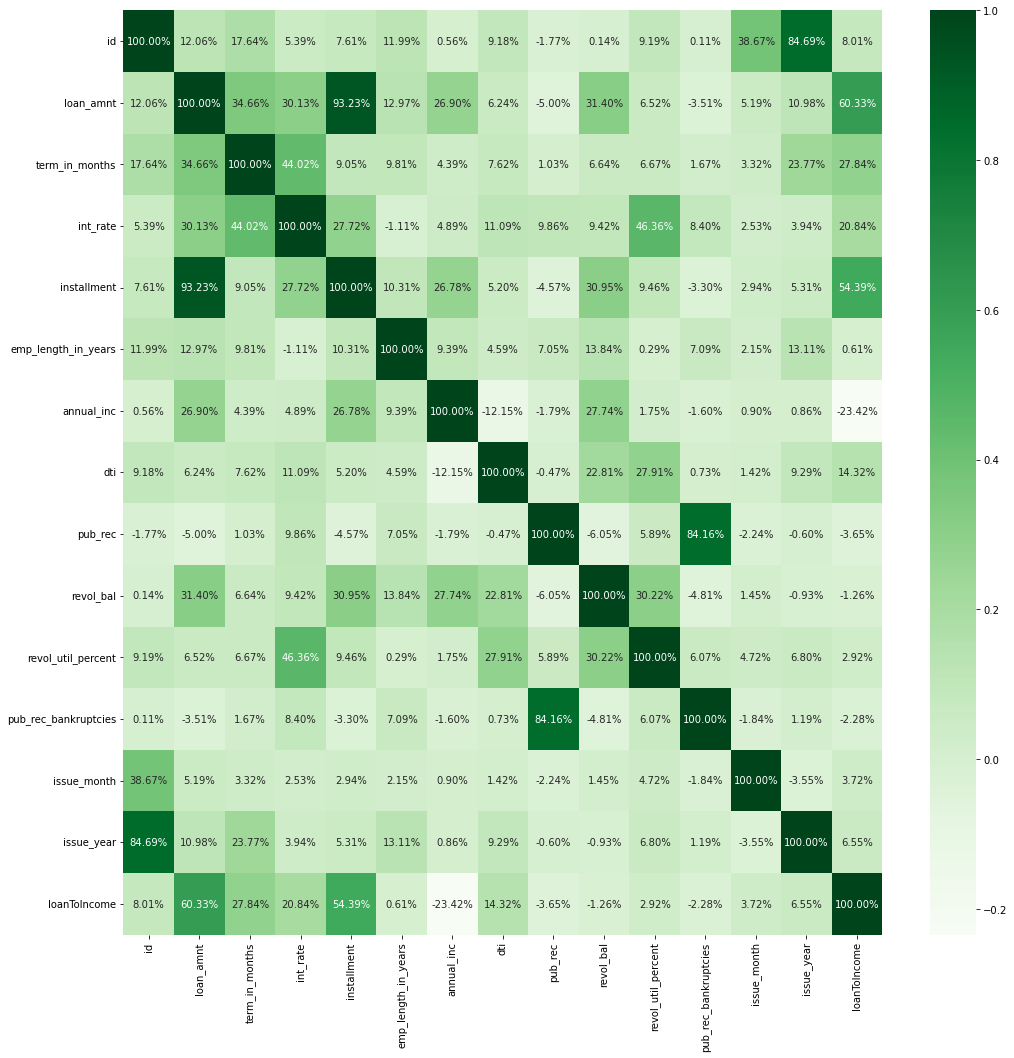

In [47]:
## Creating graph for correlation
corrData = loan_data.corr()

plt.figure(figsize=[17,17])
sns.heatmap(corrData, cmap="Greens", fmt='.2%', annot=True)
plt.show()


## Below observation are found:
# 1.  'term_in_months' has strong correlation with 'int_rate'.
# 2.  'loan_amnt' has strong correlation with 'installment'.
# 3.'pub_rec' has strong correlation with 'pub_rec_bankruptcies'.
# 4.  'int_rate' has strong correlation with 'revol_util_percent'.

In [48]:
##Univariate Analysis

In [ ]:
# Univariate Analysis on Loan amount-
## Loan Amount distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='C4')

# subplot 1
plt.subplot(2, 2, 2)
loanAmountBoxPlot = sns.boxplot(y=loan_data['loan_amnt'])
loanAmountBoxPlot.set_title('Loan Amount - Box Plot',fontsize=15,color='w')
loanAmountBoxPlot.set_xlabel('Loan Amount',fontsize=15,color='w')



plt.show()



# Observations: 
#From the below box plot, maximum loans have been applied for amount between 5K - 15K. Outlier value is more than 30,000

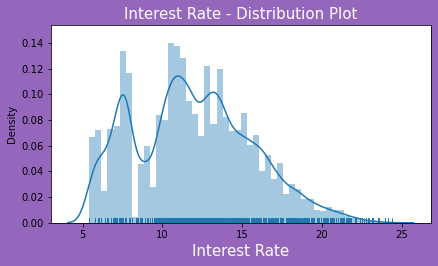

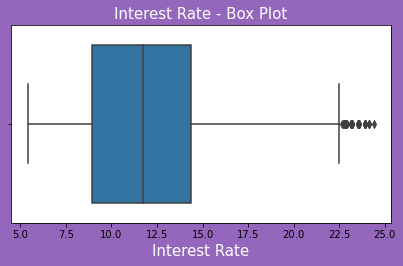

In [50]:
# Univariate Analysis on Interest rate-
## interest rate distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='C4')

# subplot 1
plt.subplot(2, 2, 1)
intRateDistPlot = sns.distplot(loan_data['int_rate'], rug=True)
intRateDistPlot.set_title('Interest Rate - Distribution Plot',fontsize=15,color='w')
intRateDistPlot.set_xlabel('Interest Rate',fontsize=15,color='w')

# subplot 2
plt.figure(figsize=(15,8),facecolor='C4')
plt.subplot(2, 2, 2)
intRateBoxPlot = sns.boxplot(x=loan_data['int_rate'])
intRateBoxPlot.set_title('Interest Rate - Box Plot',fontsize=15,color='w')
intRateBoxPlot.set_xlabel('Interest Rate',fontsize=15,color='w')

plt.show()



# Observations: 
# It is evident from the below box plot, maximum loans have interest rate between 8% - 14%. 


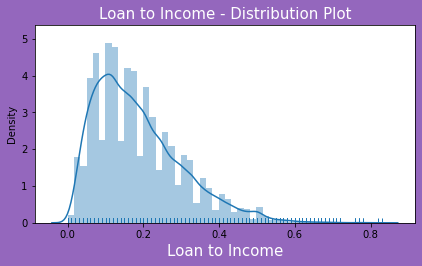

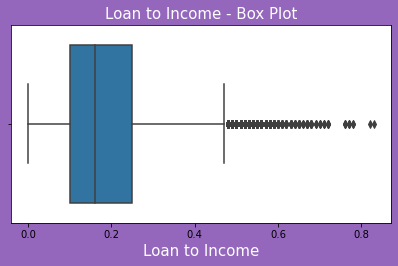

In [51]:
# Univariate Analysis on Loan to Income -
## Loan To Income distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='C4')

# subplot 1
plt.subplot(2, 2, 1)
ltiDistPlot = sns.distplot(loan_data['loanToIncome'], rug=True)
ltiDistPlot.set_title('Loan to Income - Distribution Plot',fontsize=15,color='w')
ltiDistPlot.set_xlabel('Loan to Income',fontsize=15,color='w')

# subplot 2
plt.figure(figsize=(15,8),facecolor='C4')
plt.subplot(2, 2, 2)
ltiBoxPlot = sns.boxplot(x=loan_data['loanToIncome'])
ltiBoxPlot.set_title('Loan to Income - Box Plot',fontsize=15,color='w')
ltiBoxPlot.set_xlabel('Loan to Income',fontsize=15,color='w')

plt.show()



# Observations: 
# It is evident from the below box plot, 
# maximum loans have been applied for loan value of 10%-25% of current annual income.

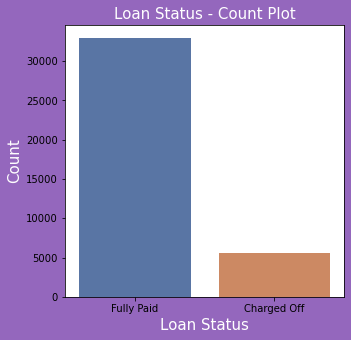

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [52]:
# Univariate Analysis on Loan Status
## Loan Status Count Plot - Unordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='C4')

loanStatusCountPlot = sns.countplot(x = 'loan_status', data=loan_data, palette = 'deep')
loanStatusCountPlot.set_title('Loan Status - Count Plot',fontsize=15,color='w')
loanStatusCountPlot.set_xlabel('Loan Status',fontsize=15,color='w')
loanStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loan_data['loan_status'].value_counts()


# Observation: 
# As checking from the below graph and data below, approximately 15% of total loans are charged off.

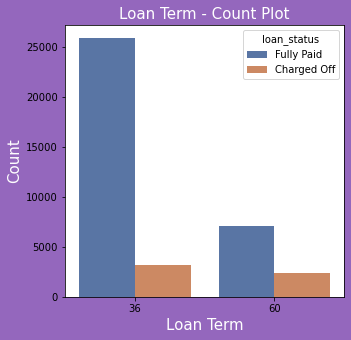

36    29096
60     9481
Name: term_in_months, dtype: int64

In [53]:
# Univariate Analysis on Loan Term -
## Loan Term Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='C4')

loanTermCountPlot = sns.countplot(x = 'term_in_months', data=loan_data, hue='loan_status', palette='deep')
loanTermCountPlot.set_title('Loan Term - Count Plot',fontsize=15,color='w')
loanTermCountPlot.set_xlabel('Loan Term',fontsize=15,color='w')
loanTermCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loan_data['term_in_months'].value_counts()


# Observation: 
# After checking from the below graph and data, 
# it is found that approximately 25% of total loans are applied for the term of 36 months.

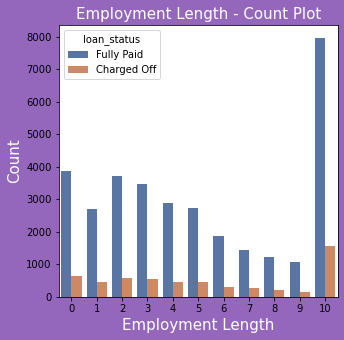

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length_in_years, dtype: int64

In [54]:
# Univariate Analysis on Employment Length 
## Employment Length Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='C4')

empTermCountPlot = sns.countplot(x = 'emp_length_in_years', data=loan_data, hue='loan_status', palette='deep')
empTermCountPlot.set_title('Employment Length - Count Plot',fontsize=15,color='w')
empTermCountPlot.set_xlabel('Employment Length',fontsize=15,color='w')
empTermCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loan_data['emp_length_in_years'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# Highest applied loans for individuals have employment period over 10 years or above. 
# individuals employed for 0, 2 and 3 years almost have same loan counts.


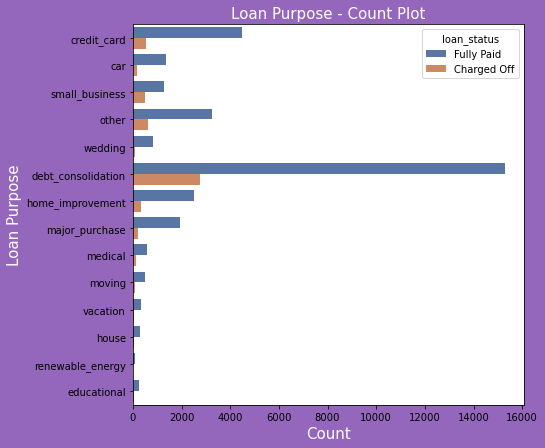

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [57]:
# Univariate Analysis on Purpose -
## Purpose Count Plot - Categorical Variable Analysis

plt.figure(figsize=(7,7),facecolor='C4')

purposeCountPlot = sns.countplot(y = 'purpose', data=loan_data, hue='loan_status', palette='deep')
purposeCountPlot.set_title('Loan Purpose - Count Plot',fontsize=15,color='w')
purposeCountPlot.set_ylabel('Loan Purpose',fontsize=15,color='w')
purposeCountPlot.set_xlabel('Count',fontsize=15,color='w')

plt.show()


loan_data['purpose'].value_counts()


# Observation: 
# After checking from the below graph and data below shows the following, 
# most of the loans have been applied for debt consolidation (approximately 40% of total loan), 
# followed by credit card, others and home improvement

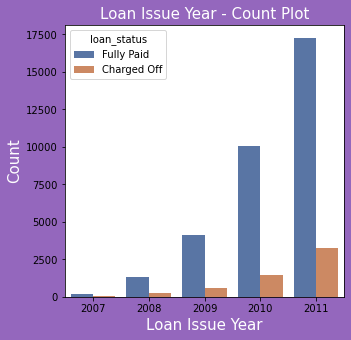

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [58]:
# Univariate Analysis on Loan Issue year -
## Loan Issue year Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='C4')

issueYearCountPlot = sns.countplot(x = 'issue_year', data=loan_data, hue='loan_status', palette='deep')
issueYearCountPlot.set_title('Loan Issue Year - Count Plot',fontsize=15,color='w')
issueYearCountPlot.set_xlabel('Loan Issue Year',fontsize=15,color='w')
issueYearCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loan_data['issue_year'].value_counts()


# Observation: 
# As checking from the below graph and data below, most no. of the loans are applied in the year 2011. 
# growth is exponential year to year basis from 2007 to 2011.

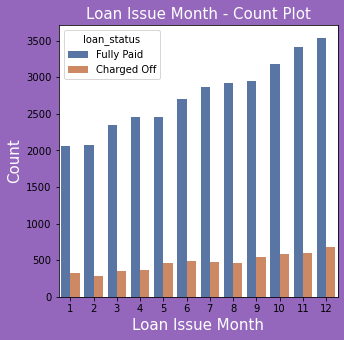

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_month, dtype: int64

In [59]:
# Univariate Analysis on Loan Issue Month 
## Loan Issue Month Count Plot - Ordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='C4')

issueYearCountPlot = sns.countplot(x = 'issue_month', data=loan_data, hue='loan_status', palette='deep')
issueYearCountPlot.set_title('Loan Issue Month - Count Plot',fontsize=15,color='w')
issueYearCountPlot.set_xlabel('Loan Issue Month',fontsize=15,color='w')
issueYearCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loan_data['issue_month'].value_counts()


### Observation: 
# After checking from the below graph and data below, most of the loans are applied in the december month.
# There is increase in loans on month basis.

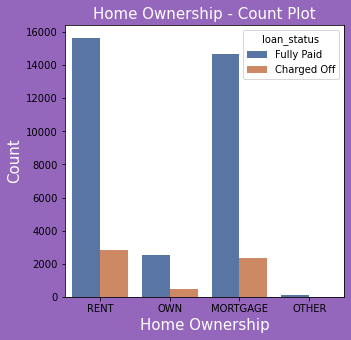

home_ownership  loan_status
RENT            Fully Paid     15641
MORTGAGE        Fully Paid     14694
RENT            Charged Off     2839
OWN             Fully Paid      2532
MORTGAGE        Charged Off     2327
OWN             Charged Off      443
OTHER           Fully Paid        80
                Charged Off       18
dtype: int64

In [60]:
# Univariate Analysis on Home Ownership -
## Home Ownership Count Plot - Categorical Variable Analysis

## 'home_ownership' has just 3 rows for 'NONE'. Ignoring 3 NONE - home ownership type
homeOwnershipDF = loan_data[~(loan_data['home_ownership'] == 'NONE')][['home_ownership', 'loan_status']]

plt.figure(figsize=(5,5),facecolor='C4')

homeOwnCountPlot = sns.countplot(x = 'home_ownership', data=homeOwnershipDF, hue='loan_status', palette='deep')
homeOwnCountPlot.set_title('Home Ownership - Count Plot',fontsize=15,color='w')
homeOwnCountPlot.set_xlabel('Home Ownership',fontsize=15,color='w')
homeOwnCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


homeOwnershipDF.value_counts()


# Observation: 
# After checking from the below graph and data, RENT and MORTGAGE Ownership type accounts for approx 90% of all loans.

# Bivariate Analysis# 

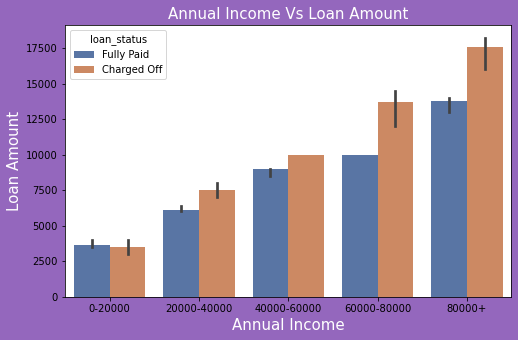

In [61]:
plt.figure(figsize=(8,5),facecolor='C4')

plot = sns.barplot(y='loan_amnt', x = 'annualIncomeCategory', hue = 'loan_status', data= loan_data, estimator=np.median, palette='deep')
plot.set_title('Annual Income Vs Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Annual Income',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')

plt.show()
## Observation: 
## The loans are getting charged off for higher loan amount in the same income category group.
## This also means that within the same income category group, individuals who have taken more loan runs a risk to default.

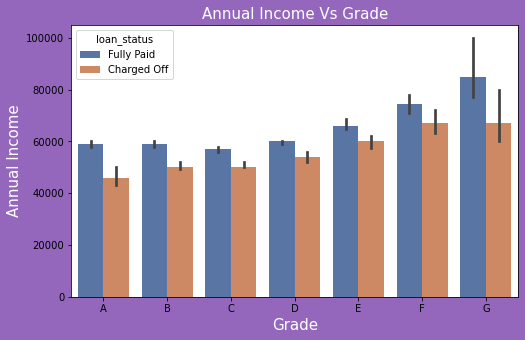

In [62]:
## Bivariate Analysis - Annual Income and Grade

plt.figure(figsize=(8,5),facecolor='C4')

plot = sns.barplot(x='grade', y = 'annual_inc', hue = 'loan_status', data= loan_data, estimator=np.median, order='ABCDEFG', palette='deep')
plot.set_title('Annual Income Vs Grade',fontsize=15,color='w')
plot.set_ylabel('Annual Income',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')

plt.show()


## Observation: 
## most loans are charged off for lesser annual income group in the same grade.

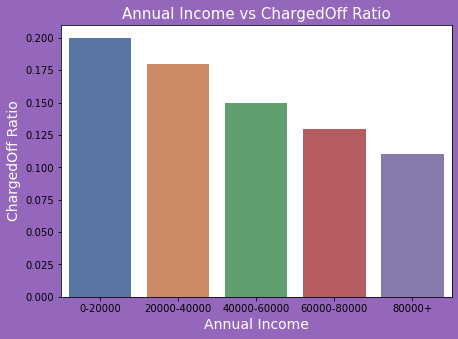

In [63]:
## Bivariate Analysis - Annual Income Category And ChargeOff Ratio

annualIncomeDF = loan_data.groupby(['annualIncomeCategory', 'loan_status']).loan_status.count().unstack().reset_index()
annualIncomeDF['Total'] = annualIncomeDF['Charged Off'] + annualIncomeDF['Fully Paid'] 
annualIncomeDF['ChargedOff_Ratio'] = round(annualIncomeDF['Charged Off'] / annualIncomeDF['Total'], 2)
annualIncomeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='C4')

plot=sns.barplot(x='annualIncomeCategory', y='ChargedOff_Ratio', data=annualIncomeDF, palette='deep')
plot.set_title('Annual Income vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Annual Income above 80000+ has least number of Charged Off ratio i.e. least risk of loan getting charged off.
# 2. Annual Income less than 20000 has the most Charged Off ratio i.e. highest risk of loan getting charged off.
# 3. With increase in annual income, risk of loan getting Charged off is reducing.

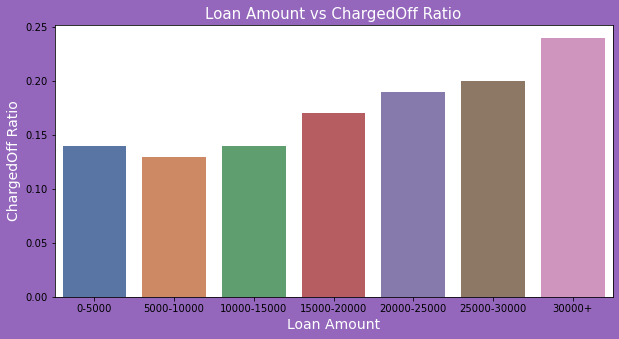

In [64]:
## Bivariate Analysis - Loan Amount Category And Loan ChargeOff Ratio

loanAmountDF = loan_data.groupby(['loanAmountCategory', 'loan_status']).loan_status.count().unstack().reset_index()
loanAmountDF['Total'] = loanAmountDF['Charged Off'] + loanAmountDF['Fully Paid'] 
loanAmountDF['ChargedOff_Ratio'] = round(loanAmountDF['Charged Off'] / loanAmountDF['Total'], 2)
loanAmountDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(10,5),facecolor='C4')

plot=sns.barplot(x='loanAmountCategory', y='ChargedOff_Ratio', data=loanAmountDF, palette='deep')
plot.set_title('Loan Amount vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Loan Amount above 30000+ has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Loan Amount of between 5000-10000 has less Charged Off ratio i.e. lower risk of loan getting charged off.
# 3. With increase in loan amount (esp. above 15000), risk of loan getting Charged off is increasing.

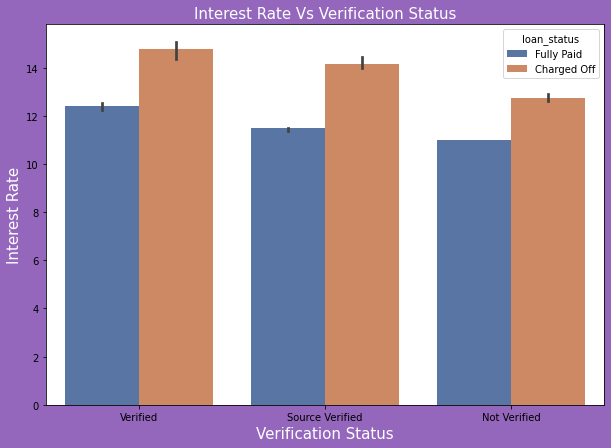

In [65]:
## Bivariate Analysis - verification Status and Interest rate

plt.figure(figsize=(10,7),facecolor='C4')

plot = sns.barplot(y='int_rate', x = 'verification_status', hue = 'loan_status', data= loan_data, estimator= np.median, palette='deep')
plot.set_title('Interest Rate Vs Verification Status',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Verification Status',fontsize=15,color='w')

plt.show()


## Observation:
#The chargeoff loans have higher interest rate 
## compared to fully Paid loans irrespective of verification status.

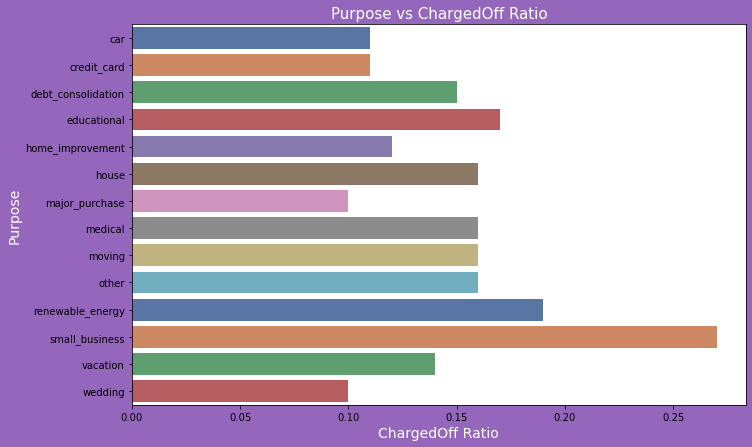

In [68]:
## Bivariate Analysis - Purpose And Chareg off Ratio

purposeDF = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purposeDF['Total'] = purposeDF['Charged Off'] + purposeDF['Fully Paid'] 
purposeDF['ChargedOff_Ratio'] = round(purposeDF['Charged Off'] / purposeDF['Total'], 2)
purposeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(11,7),facecolor='C4')

plot=sns.barplot(y='purpose', x='ChargedOff_Ratio', data=purposeDF, palette='deep')
plot.set_title('Purpose vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_xlabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_ylabel('Purpose',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Small Business - loan purpose has very high charge off ratio compared to other. 
# Small Business has high amount of charge Off risk.
# renewable_energy and education also has high charge off ratios.

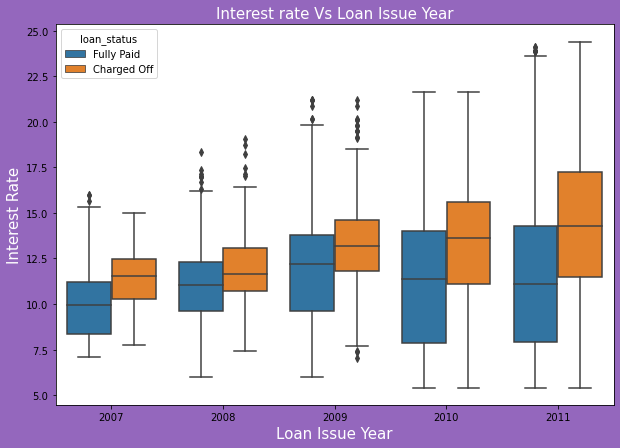

In [69]:
## Bivariate Analysis - Interest Rate and Loan Issue year

plt.figure(figsize=(10,7),facecolor='C4')

plot = sns.boxplot(y='int_rate', x = 'issue_year', hue = 'loan_status', data= loan_data)
plot.set_title('Interest rate Vs Loan Issue Year',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Loan Issue Year',fontsize=15,color='w')

plt.show()


## Observation: \
#The interest rate is slowly increasing over the years.
## Also, the variance in the interest rate is also increasing over the years.

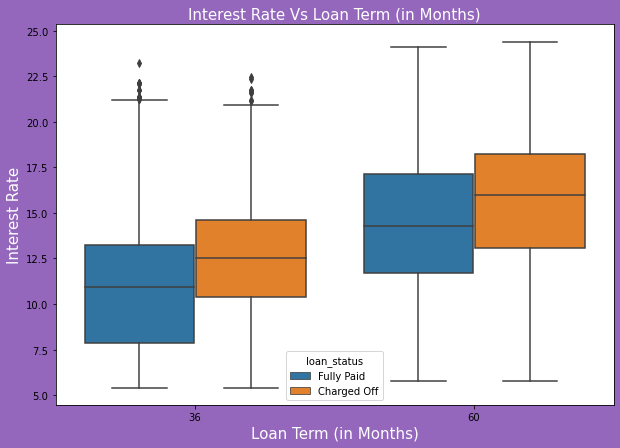

In [70]:
## Bivariate Analysis - Interest Rate Vs Loan Term

plt.figure(figsize=(10,7),facecolor='C4')

plot = sns.boxplot(y='int_rate', x = 'term_in_months', hue = 'loan_status', data= loan_data)
plot.set_title('Interest Rate Vs Loan Term (in Months)',fontsize=15,color='w')
plot.set_xlabel('Loan Term (in Months)',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')

plt.show()


## Observation: 
##Higher interest rates are charged Off for loans with 60 month term.


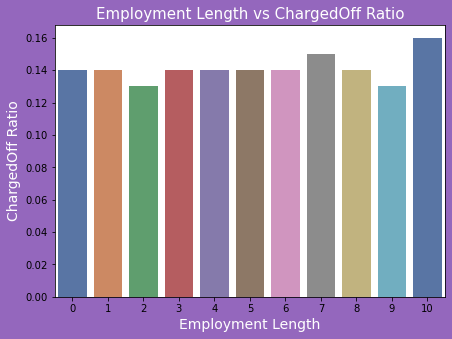

In [71]:
## Bivariate Analysis - Employment length And Charge Off Ratio

empLengthDF = loan_data.groupby(['emp_length_in_years', 'loan_status']).loan_status.count().unstack().reset_index()
empLengthDF['Total'] = empLengthDF['Charged Off'] + empLengthDF['Fully Paid'] 
empLengthDF['ChargedOff_Ratio'] = round(empLengthDF['Charged Off'] / empLengthDF['Total'], 2)
empLengthDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='C4')

plot=sns.barplot(x='emp_length_in_years', y='ChargedOff_Ratio', data=empLengthDF, palette='deep')
plot.set_title('Employment Length vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Employment Length',fontsize=14,color='w')
plt.show()

# Observations:
# # It looks like employment length does not have any influencing factor in loan decision.

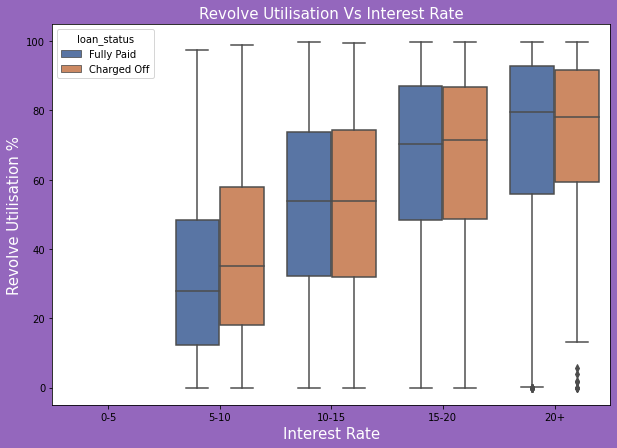

In [72]:
## Bivariate Analysis - Revolve Utilisation Vs Interest Rate

plt.figure(figsize=(10,7),facecolor='C4')

plot = sns.boxplot(y='revol_util_percent', x = 'intRateCategory', hue = 'loan_status', data=  loan_data, palette='deep')
plot.set_title('Revolve Utilisation Vs Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Interest Rate',fontsize=15,color='w')
plot.set_ylabel('Revolve Utilisation %',fontsize=15,color='w')

plt.show()


## Observation: 
##The interest rate is high for high revolve utilization.

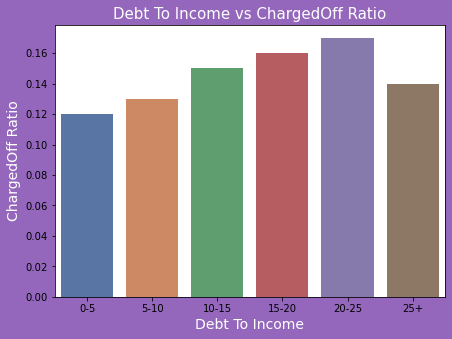

In [74]:
## Bivariate Analysis - Debt To Income Category And Loan Charge Off Ratio

dtiDF = loan_data.groupby(['dtiCategory', 'loan_status']).loan_status.count().unstack().reset_index()
dtiDF['Total'] = dtiDF['Charged Off'] + dtiDF['Fully Paid'] 
dtiDF['ChargedOff_Ratio'] = round(dtiDF['Charged Off'] / dtiDF['Total'], 2)
dtiDF.sort_values('ChargedOff_Ratio', ascending=False)

plt.figure(figsize=(7,5),facecolor='C4')

plot=sns.barplot(x='dtiCategory', y='ChargedOff_Ratio', data=dtiDF, palette='deep')
plot.set_title('Debt To Income vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Debt To Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Debt to income ratio of 20-25 has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Debt to income ratio below 5 has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With increase in debt to income ratio, risk of loan getting Charged off is increasing. However, dti ratio of 25+ 
#    is witnessing decrease in chargeoff ratio.

In [ ]:
## Conclusion
##Based on the above EDA of the loan dataset, we can identify few drivers for the loan approval process.

##Factors affecting loan defaults:

##1. Loan Amount which are greater > $30000 have more defaults

##2. Higher interest rate whish is greater than 14% have more defaults

##3. Loan Purpose ( Small Business, Renewable Energy, Education) have more defaults

##4. Higher Revolve Utilization rate (> 80%) have more defaults

##5. Lower Annual Income (< $20000) have more defaults

##6. Higher Debt To Income ratio is between (20% - 25%) 